In [1]:
from numpy import *
from matplotlib.pyplot import *

In [2]:
def grid_search_1D(func, b = [None, None], steps=100):
    """ Busca o valor que maximiza uma função f:R -> R"""

    x = linspace(b[0], b[1], steps)
    y = func(x)
    x_max = argmax(y)
    y_max = y[x_max]
    if y[-1] == y_max:
        print("AVISO: O intervalo escolhido pode estar restringindo a busca")
    return x[x_max], y_max

Testando a busca implementada para a função de transferência a seguir:

$$\frac{1}{s^2 + 10^{-6}s + 1}$$

In [3]:
f = lambda s: (1 / (s**2 + 1e-6*s + 1)) # função de transferência em s
g = lambda w: f(1j*w)

polos = roots([1, 1e-6*1j, 1])
g1 = f(1j*polos[0])
g2 = f(1j*polos[1])

print(polos)
# print(f'g(w = {polos[0]:.2f}) = {g1:.2f}')
# print(f'g(w = {polos[1]:.2f}) = {g2:.2f}')


[0.-1.0000005j 0.+0.9999995j]


In [4]:
print('w calculado:', -1e-6)
print(f(1j*sqrt(1e-6*1j)))

w calculado: -1e-06
(1.0000000007061083+9.992928946310291e-07j)


In [5]:
x = linspace(0.1, 10, 10)
max(abs(g(x)))

2.2727272727188184

Norma-infinito encontrada: 1.000000180000018 940887.2414228349 (119.47 dB)
|f(w = 0j)|=1.0


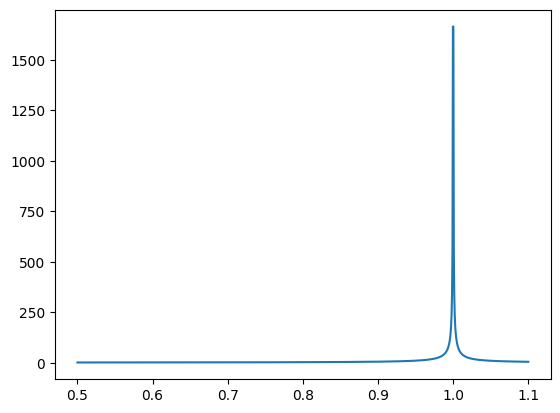

In [6]:


w = linspace(1/2, 1.1, 1000)
w_max, sup_f = grid_search_1D(lambda x: abs(f(1j*x)), [0.1, 10], steps=10000000)
print('Norma-infinito encontrada:', w_max , sup_f, f'({20*log10(sup_f):.2f} dB)')
print(f'|f(w = 0j)|={abs(f(0))}')
plot(w, abs(f(1j*w)))
# plot([0, w_max], [sup_f, sup_f], 'r--')

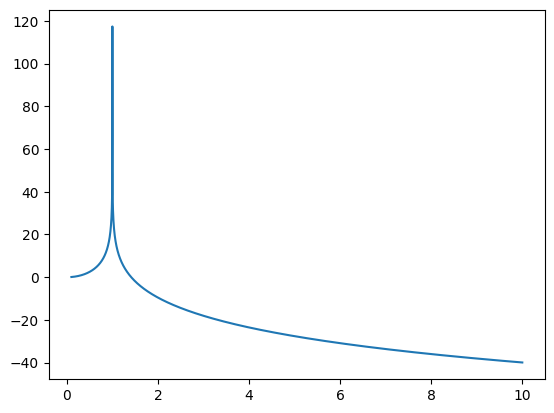

In [7]:
from scipy.signal import bode

w, mag, phase = bode(([1], [1, 1e-6, 1]), n=5000000)
plot(w, mag)

In [8]:
from sympy import symbols
import sympy as sp

z = symbols('w')

num = 1
den = z**2 + 1e-6*z + 1
G = num / den

f = G.subs({z: 1j*z})
df = f.diff(z)
sp.solve(df, z)




[5.0e-7*I]

## Problema 2 - Capítulo 2

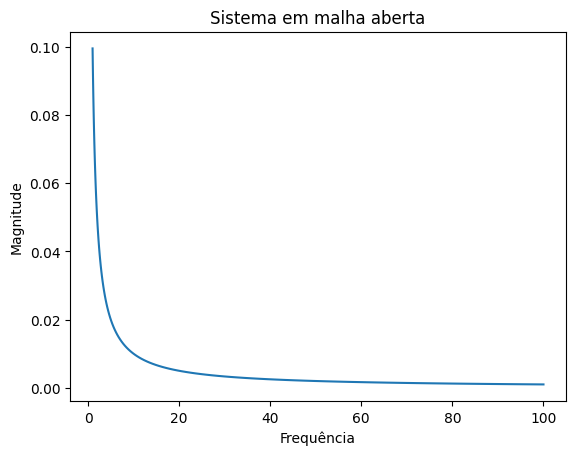

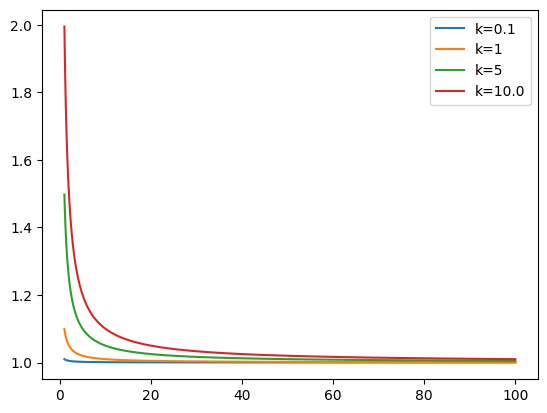

In [9]:
P = lambda s: 1 / (10*s + 1)

w = logspace(0, 2, 100)

figure()
plot(w, abs(P(1j*w)))
ylabel('Magnitude')
xlabel('Frequência')
title('Sistema em malha aberta')

figure()
gains = [0.1, 1, 5, 1e1]
for k in gains:
    plot(w, 1+abs(P(1j*w)*k), label=f'k={k}')
legend()


A relação saída-pertubação é dada pela equação transferência a seguir:

\begin{equation*}
Y(s) = \frac{P(s)}{1 + P(s)C(s)F(s)}D(s) = G_d(s)D(s)
\end{equation*} 

Logo, 
\begin{equation*}
Y(s) = \frac{1}{10s + k + 1}D(s)
\end{equation*}

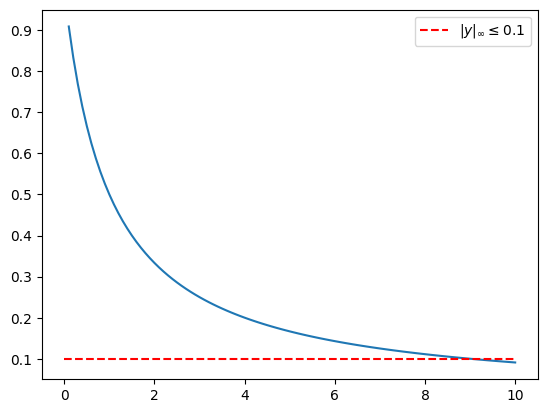

In [10]:
Gd = lambda s, k: 1 / (10*s + k + 1)
w = linspace(0, 10, 1000) 

gains = linspace(0.1, 10, 100)

sups = []
for k in gains:
    _, sup = grid_search_1D(lambda w: abs(Gd(1j*w, k)), (0, 10), 100)
    sups.append(sup)

plot(gains, sups)
plot([0, 10], [0.1, 0.1], 'r--', label='$|y|_{\infty} \leq 0.1$')
legend()

## Capítulo 3 - Problema 4

A questão é teórica, então será abordado uma caso simulado com base nos pontos levantados na discussão teórica.

* Escolhendo F(s) próprio ($F(j\infty) = 0$):
$$F(s) = 1$$
* Escolhendo P(s) estritamente próprio ($F(j\infty) < \infty $):
$$P(s) = \frac{1}{(s+1)(s+2)}$$

Text(0.5, 0, '$\\omega$ rad/s')

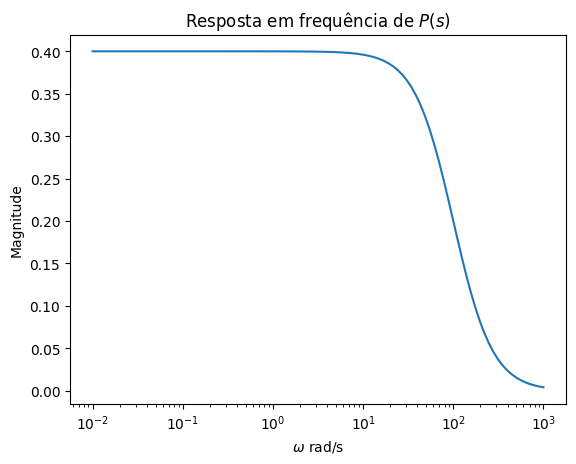

In [11]:
F = lambda s: 1
P = lambda s: 4000 / (s + 101)/(s + 99)

w = logspace(-2, 3, 100)
mag = abs(P(1j*w))

figure()
title('Resposta em frequência de $P(s)$')
semilogx(w, mag)
ylabel('Magnitude')
xlabel('$\omega$ rad/s')

* Para rejeição de uma pertubação senoidal

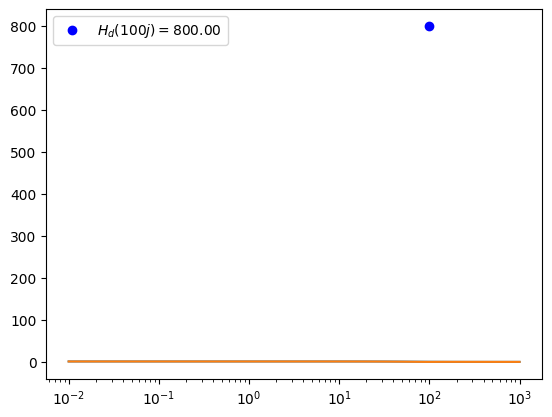

In [12]:
d = lambda s: 100 / (100**2 + s**2)
Hd = lambda s, C: P(s) / (1 / P(s)*F(s)*C(s))

C1 = lambda s: 1 / 20000
C2 = lambda s: 1 / (s**2 + 100**2)

wd = 100j
h1 = abs(Hd(wd, C1))
# h2 = abs(Hd(wd, C2))

figure()
mag1 = abs(Hd(1j*w, C1)) / abs(Hd(0, C1))
mag2 = abs(Hd(1j*w, C2)) / abs(Hd(0, C2))
semilogx(w, mag1);
semilogx(w, mag2);
plot(100, h1, 'bo', label=f'$H_d(100j) = {h1:.2f}$');
legend();

A rejeição na frequência de 100 rad/s
$$H_d(j100) = ?$$

In [13]:
print('Rejeição para C(s) = 1: ', Hd(100j, C1)) 

Rejeição para C(s) = 1:  (-799.999994+0.07999999959994282j)


## Problema 4 - Capítulo 4

In [28]:
eta = 1
wn = 100

x1 = -2*eta**2*wn**2 + wn**2*sqrt(1+4*eta**4)
x2 = -2*eta**2*wn**2 - wn**2*sqrt(1+4*eta**4)
print(x1, x2) 
print(sqrt(1+4*eta**4)) 

2360.6797749978978 -42360.6797749979
2.23606797749979


In [63]:
alpha = 0.62
cr1 = alpha*(alpha+1) - 1
print(cr1)

0.0043999999999999595


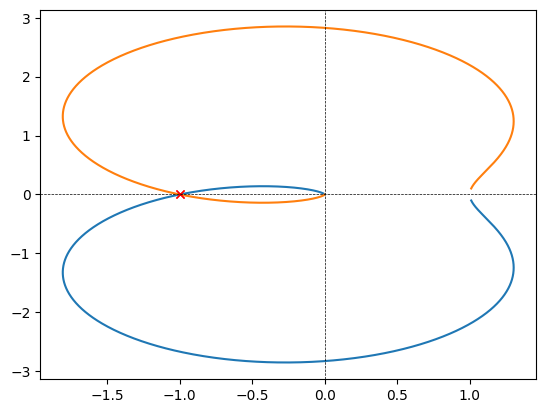

In [69]:
from scipy.signal import freqresp

alpha = 1
w, L = freqresp(([1], [1, (1+alpha), alpha])) # malha fechada com C(s) = 1
w, L = freqresp(([1], [1, (1+alpha), alpha, 1]))

# w, mag, phase = bode(([1], [1, 0]))

plot(L.real, L.imag)
plot(L.real, -L.imag)
plot(-1, 0, 'xr') # polo
plot(-alpha, 0, 'xr') # polo
axhline(0, color='black', linewidth=0.5, linestyle='--')
axvline(0, color='black', linewidth=0.5, linestyle='--')

## Problema 8

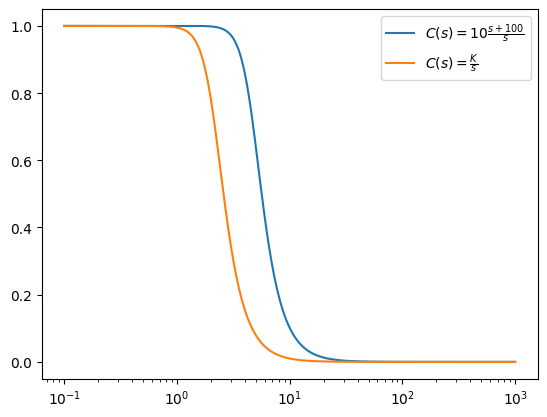

In [186]:
P = lambda s: 1/(s*s)

C1 = lambda s, K, Z: K*(s+Z)/s
C2 = lambda s, K: (K/s)
C3 = lambda s, K: (K)

L = lambda s, K, Z: P(s) * C1(s, K, Z)

w = logspace(-1, 3, 10000)
L1 = L(1j*w, 1, 100)
L2 = lambda s: P(s) * C2(s, 10)
H2 = lambda s: L2(s) / (1 + L2(s))

H = L1 / (1 + L1)

magH = abs(H)
magH2 = abs(H2(1j*w))

semilogx(w, magH, label='$C(s)=10\\frac{s+100}{s}$')
semilogx(w, magH2, label='$C(s)=\\frac{K}{s}$')
legend();

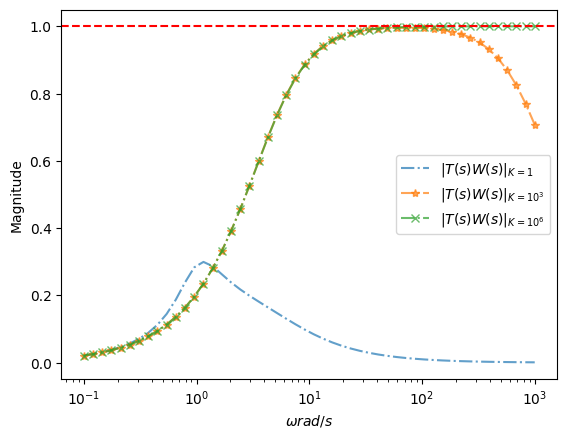

In [211]:
w = logspace(-1, 3, 50)
s = 1j*w

W2 = lambda s: 0.21*s / (0.21*s + 1)
C = lambda s, K: K*(s + 1)
L = lambda s, K: P(s) * C(s, K)
L_K1 = L(1j*w, 1)
L_K1k = L(1j*w, 1e3)
L_K1M = L(1j*w, 1e6)

T = lambda L: L / (1 + L)
H2 = lambda s: L2(s) / (1 + L2(s))


TW2 = H2(1j*w) * W2(1j*w)

# semilogx(w, abs(H2(1j*w)), '--k', label='$|T(s)|$')
# semilogx(w, abs(W2(1j*w)), '-.k', label='$|W2(s)|$')
semilogx(w, abs(T(L_K1)*W2(s)), '-.',   alpha=0.7, label='$|T(s)W(s)|_{K=1}$')
semilogx(w, abs(T(L_K1k)*W2(s)), '-.*', alpha=0.7, label='$|T(s)W(s)|_{K=10^3}$')
semilogx(w, abs(T(L_K1M)*W2(s)), '-.x', alpha=0.7, label='$|T(s)W(s)|_{K=10^6}$')

axhline(1, linestyle='--', color='red', label='')
xlabel('$\omega rad/s$')
ylabel('Magnitude')
legend();


In [210]:
W2T1 = abs(T(L_K1)*W2(s))
W2T2 = abs(T(L_K1k)*W2(s))
W2T3 = abs(T(L_K1M)*W2(s))
print(max(W2T1))
print(max(W2T2))
print(max(W2T3))

0.2995315722179033
0.9962359703529506
0.9999891623185427


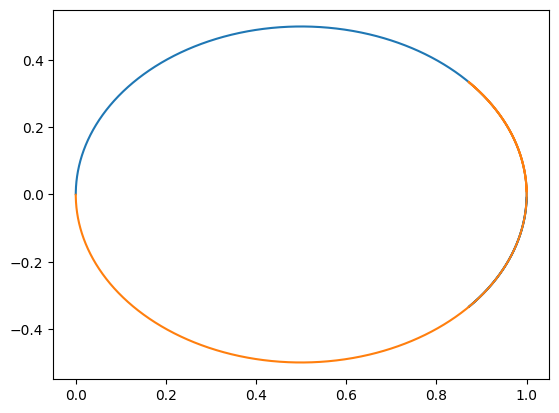

In [207]:
w, L = freqresp(([1], [1, 0, 1, 1])) 
plot(L.real, L.imag)
plot(L.real, -L.imag)